In [12]:
## فراخوانی کتابخانه های مربوط به خواندن فایل و پردازش داده ها
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
land_data = pd.read_csv("/content/drive/MyDrive/land_data_cleaned.csv")
land_data = land_data.rename(columns={"Land":"land_size"})
data = pd.read_csv("/content/drive/MyDrive/cleaned_23_42(5).csv")

g = pd.concat([land_data, data],axis=0)


# data = "/content/drive/MyDrive/Colab Notebooks/Divar.csv"
# data_set = pd.read_csv(data, encoding='utf-8')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# بدست آوردن میانگین های دو گروه یک دید خوبی به ما میده
d = g[["construction_year", "land_size"]].dropna()
d["construction_year"] = d["construction_year"].astype("int")
d["status"] = d["construction_year"].apply(lambda x: "old" if x < 1396 else "new")
land_hous = d.groupby("status")["land_size"].mean()
land_hous
d["land_size"] = pd.to_numeric(d["land_size"], errors='coerce')
d["construction_year"] = pd.to_numeric(d["land_size"], errors='coerce')


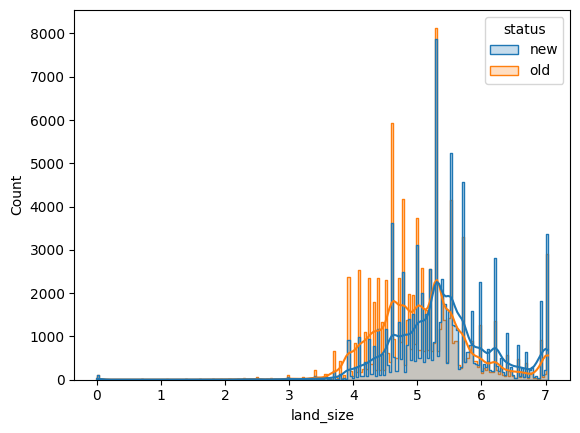

In [30]:
# نمایش نمودار باعث دیدن توزیع در هر گروهه
sns.histplot(data=d, x="land_size", hue="status", kde=True, element="step")
plt.show()

In [31]:
old = d.loc[d["status"]=="old","land_size"]
new = d.loc[d["land_size"]=="new","land_size"]

levene_stat, levene_p = stats.levene(old, new)
equal_var = (levene_p > 0.05)

tstat, p_two = stats.ttest_ind(old, new, equal_var=equal_var, nan_policy='omit')

print(tstat, p_two)

nan nan


/tmp/ipython-input-2999940747.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  levene_stat, levene_p = stats.levene(old, new)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Mounted at /content/drive


در ابتدا ستون های title و description و user_type را حذف میکنیم

In [ ]:





















































































# # جدا کردن ستون های مد نظر برای پردازش
# file = data_set.iloc[:, 0:9]
# # حذف ستون ها
# clean_df = file.drop(["description","title","user_type","Unnamed: 0"], axis=1)
# # تبدیل تاریخ میلادی به شمسی و ایجاد یک ستون جدید به نام سال ثبت آگهی
# clean_df["created_at_month"] = pd.to_datetime(clean_df["created_at_month"])
# clean_df["created_at_year"] = clean_df["created_at_month"].apply(
#     lambda x: jdatetime.date.fromgregorian(date=x.date()).year
# )
# clean_df["created_at_month"] = clean_df["created_at_month"].apply(
#     lambda x: jdatetime.date.fromgregorian(date=x.date()).month
# )
# clean_df
# # ##### تغیر در طول و عرض جغرافیایی با utm
# # x_longitude = data_set["location_longitude"]
# # y_latitude = data_set["location_latitude"]
# # from pyproj import Transformer
# # # 2) تعریف ترنسفورمر (WGS84 -> UTM Zone 39N)
# # transformer = Transformer.from_crs("epsg:4326", "epsg:32639", always_xy=True)
# # # 3) تبدیل مختصات
# # utm_easting, utm_northing = transformer.transform(x_longitude.values, y_latitude.values)
# # # 4) اضافه کردن ستون‌های جدید
# # data_set["UTM_Easting"]  = utm_easting
# # data_set["UTM_Northing"] = utm_northing
# # utm_df = data_set.copy()
# # # 1) utm mean
# # neigh_means = utm_df.groupby('neighborhood_slug')[['UTM_Easting','UTM_Northing']].transform('mean')
# # # 2) filling bu mean
# # utm_df['UTM_Easting']  = utm_df['UTM_Easting'].fillna(neigh_means['UTM_Easting'])
# # utm_df['UTM_Northing'] = utm_df['UTM_Northing'].fillna(neigh_means['UTM_Northing'])
# # city_means = utm_df.groupby('city_slug')[['UTM_Easting','UTM_Northing']].transform('mean')
# # # 2) filling by city mean
# # utm_df['UTM_Easting']  = utm_df['UTM_Easting'].fillna(city_means['UTM_Easting'])
# # utm_df['UTM_Northing'] = utm_df['UTM_Northing'].fillna(city_means['UTM_Northing'])
# # # اندیس‌ها
# # i_shiraz = 676502
# # i_tehran = 292674
# # # میانگین شیراز
# # shiraz_mean = utm_df.loc[utm_df['city_slug'] == 'shiraz', ['UTM_Easting','UTM_Northing']].mean()
# # # میانگین تهران
# # tehran_mean = utm_df.loc[utm_df['city_slug'] == 'tehran', ['UTM_Easting','UTM_Northing']].mean()
# # # جایگزینی NaNها
# # utm_df.loc[i_shiraz, ['UTM_Easting','UTM_Northing']] = shiraz_mean
# # utm_df.loc[i_tehran, ['UTM_Easting','UTM_Northing']] = tehran_mean
# # ### تبدیل عددی داده ها
# # lable = ["cat2_slug","cat3_slug","city_slug","neighborhood_slug"]
# # for col in lable:
# #     unique_vals = clean_df[col].dropna().unique()
# #     mapping = {val: i for i, val in enumerate(unique_vals, start=1)}
# #     clean_df[col] = clean_df[col].astype("category").cat.codes

# clean_df.to_csv("/content/drive/MyDrive/data_set56.csv", index=False, encoding='utf-8')

# # final_df = pd.concat(clean_df, ignore_index=True)
# # output_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_data_set.csv"
# # final_df.to_csv(output_path, index=False, encoding='utf-8')
# # final_df.head()
# #### پر کردن neighborhood_slug
# # clean_df = pd.concat([clean_df, utm_df["UTM_Easting"], utm_df["UTM_Northing"]], axis=1)
# # clean_df['neighborhood_slug'] = clean_df['neighborhood_slug'].replace(-1, np.nan)
# # imputer = KNNImputer(n_neighbors=2)
# # batch_size = 50000
# # results = []
# # for start in range(0, len(clean_df), batch_size):
# #     end = start + batch_size
# #     batch = clean_df.iloc[start:end].copy()
# #     knn_features = batch[["city_slug","UTM_Easting","UTM_Northing","neighborhood_slug"]]
# #     imputed = imputer.fit_transform(knn_features)
# #     batch["neighborhood_slug"] = imputed[:, 3]
# #     results.append(batch)
# # final_df = pd.concat(results, ignore_index=True)
# # output_path = "/content/drive/MyDrive/Colab Notebooks/Divar_cleaned.csv"
# # final_df.to_csv(output_path, index=False, encoding='utf-8')
# # final_df.head()


# # imputer = KNNImputer(n_neighbors=2)
# # batch_size = 50000
# # results = []
# # for start in range(0, len(clean_df), batch_size):
# #     end = start + batch_size
# #     batch = clean_df.iloc[start:end].copy()
# #     knn_features = batch[["city_slug","UTM_Easting","UTM_Northing","neighborhood_slug"]]
# #     imputed = imputer.fit_transform(knn_features)
# #     batch["neighborhood_slug"] = imputed[:, 3]
# #     results.append(batch)
# # # چسباندن دسته‌ها
# # final_df = pd.concat(results, ignore_index=True)
# # final_df
# # # clean_df = pd.concat([clean_df,utm_df["UTM_Easting"],utm_df["UTM_Northing"]],axis=1)
# # # clean_df['neighborhood_slug'] = clean_df['neighborhood_slug'].replace(-1,np.nan)
# # # knn_features = clean_df[["city_slug","UTM_Easting","UTM_Northing","neighborhood_slug"]]
# # # imputer = KNNImputer(n_neighbors=2)
# # # imputed = imputer.fit_transform(knn_features)
# # # imputed
# # # clean_df["neighborhood_slug"] =imputed[:,3]
# # # output_path = "/content/drive/MyDrive/Colab Notebooks/Divar_cleaned.csv"
# # # clean_df.to_csv(output_path, index=False, encoding='utf-8')
# # # clean_df
# # sub_df = clean_df[knn_columns]
# # imputer = KNNImputer(n_neighbors=5)
# # imputed = imputer.fit_transform(sub_df)
# # clean_df[knn_columns] = imputed
# # clean_df["neighborhood_slug"] = clean_df["neighborhood_slug"].round().astype(int)
# # neighborhood_mapping = dict(enumerate(neighborhood_categories.cat.categories))
# # clean_df["neighborhood_slug"] = clean_df["neighborhood_slug"].map(neighborhood_mapping)
# # # ذخیره فایل
# # final_df = clean_df.copy()
# # # ذخیره‌سازی در فایل CSV جدید
# # output_path = "/content/drive/MyDrive/Colab Notebooks/Divar_cleaned.csv"
# # final_df.to_csv(output_path, index=False, encoding='utf-8')


In [ ]:
####### نمایش توزیع آگهی های موجود در دسته بندی 2 و 3
# cat2 = file["cat2_slug"].value_counts()
# cat3 = file["cat3_slug"].value_counts()
# sns.countplot(data=file, y="cat2_slug", order=cat2.index)
# plt.title("Distribution_cat2")
# plt.xlabel("number")
# plt.ylabel("cat2")
# plt.show()
# sns.countplot(data=file, y="cat3_slug", order=cat3.index)
# plt.title("Distribution_cat3")
# plt.xlabel("number")
# plt.ylabel("cat3")
# plt.show()


########

#تعداد آگهی‌های منتشر شده در ماه‌های مختلف را برای فروش و اجاره
# df_2 = clean_df.copy()
# df_2["cat2_slug"] = df_2["cat2_slug"].replace({
#     "residential-sell":"sell",
#     "residential-rent": "rent",
#     "commercial-rent":"rent",
#     "commercial-sell":"sell",
#     "temporary-rent":"rent"
# })
# sns.countplot(data=df_2, x="created_at_month", hue="cat2_slug")
# plt.title("ct2")
# plt.xlabel("month")
# plt.ylabel("number")
# plt.legend(title="cat2")
# plt.show()
##############
# هیستوگرام سال ساخت
# year = df
# sns.histplot(data=year, bins=30, kde=True)
# plt.title("year-Distribution", fontsize=14)
# plt.xlable("year", fontsize=12)
# plt.ylable("number", fontsize=12)
# plt.grid(axis='y', alpha=0.3)
# plt.show()

##########





